In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

import pandas as pd
import numpy as np

In [18]:
def doplot(plotWhat, title):
    
    fig, ax = plt.subplots(figsize=(20, 20))

    cmap = plt.get_cmap('Oranges')   

    pc = PatchCollection(dfPoly.shapes, zorder=2)
    norm = Normalize()

    pc.set_facecolor(cmap(norm(dfPoly[plotWhat].fillna(0).values)))
    ax.add_collection(pc)

    mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
    mapper.set_array(dfPoly[plotWhat])

    m.drawmapboundary(fill_color = '#46bcec')
    m.fillcontinents(color='#f2f2f2', lake_color = '#46bcec')
    m.drawcountries()

    plt.colorbar(mapper, shrink=0.4)
    plt.title(title, fontsize = 25)
    
    fig.savefig(plotWhat, bbox_inches='tight')
    plt.close(fig)

def prepCsv(ending, base, profession = False):
    file = '/home/ram22/dataDrive/dataProjects/povMap/zambiaLFSmapping/3_csvOutput/censuswardlabor' + ending + '.csv'
    db = pd.read_csv(file)
    db.rename(columns={'pop12plus': 'pop' + ending.title(), 
                       'lf12months': 'lf12m' + ending.title(), 
                       'empl12months': 'empl12m' + ending.title()},
              inplace = True)
    db.drop(['dist', 'const', 'ward', 'population', 'lf7days', 'empl7days', 'unem7days', 'unem12months'], 
              axis = 1, inplace = True)
    if profession == True:
        db.drop(['pop' + ending.title(), 'lf12m' + ending.title(),], axis = 1, inplace = True)
    
    base = base.merge(db, on = 'wardid', how = 'outer', indicator = True)
    print(base._merge.value_counts())
    base.drop('_merge', axis = 1, inplace = True)
    
    return base

def prepCsvRegion(region, ending, base, profession = False):
    file = '/home/ram22/dataDrive/dataProjects/povMap/zambiaLFSmapping/3_csvOutput/censusward' + region + 'labor' + ending + '.csv'
    db = pd.read_csv(file)
    db.rename(columns={'population' : 'pop' + region.title() + ending.title(),
                       'pop12plus' : 'pop12plus' + region.title() + ending.title(), 
                       'lf12months' : 'lf12m' + region.title() + ending.title(), 
                       'empl12months' : 'empl12m' + region.title() + ending.title()},
              inplace = True)
    db.drop(['dist', 'const', 'ward', 'region', 'wardregionid', 'lf7days', 'empl7days', 'unem7days', 'unem12months'], 
              axis = 1, inplace = True)
    if profession == True:
        db.drop(['pop' + region.title() + ending.title(), 'lf12m' + region.title() + ending.title(),], axis = 1, inplace = True)
    
    base = base.merge(db, on = 'wardid', how = 'outer', indicator = True)
    print(base._merge.value_counts())
    base.drop('_merge', axis = 1, inplace = True)
    
    return base


(1421,
 5,
 [21.998040874782703, -18.075163999950632, 0.0, 0.0],
 [33.708576224001774, -8.224359999937205, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x7f632008a6d8>)

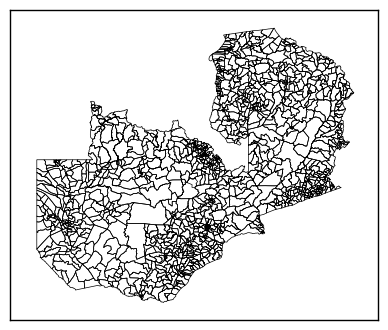

In [19]:
# Prepare basemap and load ward borders into it
m = Basemap(resolution = 'h', # c, l, i, h, f or None
           projection = 'merc',
           lat_0 = 27.80, lon_0 = -13.20,
           llcrnrlon = 21.01, llcrnrlat = -18.69, urcrnrlon = 34.61, urcrnrlat = -7.56)

m.readshapefile('/home/ram22/dataDrive/dataProjects/povMap/zambiaLFSmapping/0_originalData/Zambia/administrative_shapefiles/ward/WardShapefiles11June2014/Final_edits_Zambia_Wards_2014t', 
                'wards')

In [20]:
# Load csv files with data. Use this to rename and merge as needed
laborAll = pd.read_csv('/home/ram22/dataDrive/dataProjects/povMap/zambiaLFSmapping/3_csvOutput/censuswardlaborall.csv')
laborAll.drop(['dist', 'const', 'ward', 'lf7days', 'empl7days', 'unem7days', 'unem12months'], 
              axis = 1, inplace = True)

laborAll = prepCsv('1524', laborAll)
laborAll = prepCsv('2564', laborAll)
laborAll = prepCsv('male', laborAll)
laborAll = prepCsv('female', laborAll)
laborAll = prepCsv('agriculture', laborAll, profession = True)
laborAll = prepCsv('manufacture', laborAll, profession = True)
laborAll = prepCsv('otherindustry', laborAll, profession = True)
laborAll = prepCsv('mining', laborAll, profession = True)
laborAll = prepCsv('semiskilled', laborAll)
laborAll = prepCsv('unskilled', laborAll)
laborAll = prepCsv('skilled', laborAll)

laborAll = prepCsvRegion('urban', 'all', laborAll)
laborAll = prepCsvRegion('rural', 'all', laborAll)

laborAll.fillna(0, inplace = True)

laborAll.head()

both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
left_only     1051
both           370
right_only       0
Name: _merge, dtype

,wardid,population,pop12plus,lf12months,empl12months,pop1524,lf12m1524,empl12m1524,pop2564,lf12m2564,...,lf12mSkilled,empl12mSkilled,popUrbanAll,pop12plusUrbanAll,lf12mUrbanAll,empl12mUrbanAll,popRuralAll,pop12plusRuralAll,lf12mRuralAll,empl12mRuralAll
0,10100101,16483,9847,5358,5080,3284,1287,1182.0,4610,3498,...,230.0,221.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10100102,6814,4112,1576,1385,1422,348,269.0,1886,1042,...,136.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10100103,15802,9163,4827,4733,3124,1193,1156.0,4247,3203,...,179.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10100104,21210,13021,6667,6374,4458,1579,1463.0,6145,4443,...,443.0,426.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10100105,23635,14142,6523,5905,4632,1480,1232.0,7164,4589,...,493.0,469.0,2638.0,1741.0,558.0,334.0,2638.0,1741.0,558.0,334.0


In [21]:
#Create indicators
dataFile = laborAll
dataFile['lfRate12months'] = round(dataFile.lf12months / dataFile.pop12plus * 100, 2)
dataFile['emplRate12months'] = round(dataFile.empl12months / dataFile.lf12months * 100, 2)
dataFile['pop1524Rate'] = round(dataFile.pop1524 / dataFile.pop12plus * 100, 2)
dataFile['empl1524Rate'] = round(dataFile.empl12m1524 / dataFile.pop1524 * 100, 2)
dataFile['pop2564Rate'] = round(dataFile.pop2564 / dataFile.pop12plus * 100, 2)
dataFile['empl2564Rate'] = round(dataFile.empl12m2564 / dataFile.pop2564 * 100, 2)
dataFile['popMaleRate'] = round(dataFile.popMale / dataFile.pop12plus * 100, 2)
dataFile['emplMaleRate'] = round(dataFile.empl12mMale / dataFile.popMale * 100, 2)
dataFile['popFemaleRate'] = round(dataFile.popFemale / dataFile.pop12plus * 100, 2)
dataFile['emplFemaleRate'] = round(dataFile.empl12mFemale / dataFile.popFemale * 100, 2)
dataFile['emplAgricultureRate'] = round(dataFile.empl12mAgriculture / dataFile.empl12months * 100, 2)
dataFile['emplManufactureRate'] = round(dataFile.empl12mManufacture / dataFile.empl12months * 100, 2)
dataFile['emplMiningRate'] = round(dataFile.empl12mMining / dataFile.empl12months * 100, 2)
dataFile['emplOtherindustryRate'] = round(dataFile.empl12mOtherindustry / dataFile.empl12months * 100, 2)

dataFile['popSemiskilledRate'] = round(dataFile.popSemiskilled / dataFile.pop12plus * 100, 2)
dataFile['emplSemiskilledRate'] = round(dataFile.empl12mSemiskilled / dataFile.popSemiskilled * 100, 2)
dataFile['popUnskilledRate'] = round(dataFile.popUnskilled / dataFile.pop12plus * 100, 2)
dataFile['emplUnskilledRate'] = round(dataFile.empl12mUnskilled / dataFile.popUnskilled * 100, 2)
dataFile['popSkilledRate'] = round(dataFile.popSkilled / dataFile.pop12plus * 100, 2)
dataFile['emplSkilledRate'] = round(dataFile.empl12mSkilled / dataFile.popSkilled * 100, 2)

dataFile['popUrbanRate'] = round(dataFile.popUrbanAll / dataFile.population * 100, 2)
dataFile['lfUrbanRate12months'] = round(dataFile.lf12mUrbanAll / dataFile.lf12months * 100, 2)
dataFile['emplUrbanRate12months'] = round(dataFile.empl12mUrbanAll / dataFile.lf12mUrbanAll * 100, 2)


In [26]:
dataFile['popRuralRate'] = round(dataFile.popRuralAll / dataFile.population * 100, 2)
dataFile['lfRuralRate12months'] = round(dataFile.lf12mRuralAll / dataFile.lf12months * 100, 2)
dataFile['emplRuralRate12months'] = round(dataFile.empl12mRuralAll / dataFile.lf12mRuralAll * 100, 2)

In [23]:
dataFile.head()

,wardid,population,pop12plus,lf12months,empl12months,pop1524,lf12m1524,empl12m1524,pop2564,lf12m2564,...,emplSemiskilledRate,popUnskilledRate,emplUnskilledRate,popSkilledRate,emplSkilledRate,popUrbanRate,lfUrbanRate12months,emplUrbanRate12months,popRuralRate,lfRuralRate12months
0,10100101,16483,9847,5358,5080,3284,1287,1182.0,4610,3498,...,57.88,33.70,43.88,2.63,85.33,0.00,0.00,NaN,0.00,0.00
1,10100102,6814,4112,1576,1385,1422,348,269.0,1886,1042,...,37.79,28.72,29.55,4.62,62.63,0.00,0.00,NaN,0.00,0.00
2,10100103,15802,9163,4827,4733,3124,1193,1156.0,4247,3203,...,58.99,37.63,46.03,2.14,90.82,0.00,0.00,NaN,0.00,0.00
3,10100104,21210,13021,6667,6374,4458,1579,1463.0,6145,4443,...,52.11,34.28,47.27,3.92,83.37,0.00,0.00,NaN,0.00,0.00
4,10100105,23635,14142,6523,5905,4632,1480,1232.0,7164,4589,...,48.65,28.87,37.20,3.90,84.96,11.16,8.55,59.86,11.16,8.55


In [27]:
dfPoly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.wards],
        'wardid': [int(ward['ID']) for ward in m.wards_info]
    })
dfPoly = dfPoly.merge(dataFile, on = 'wardid', how = 'outer', indicator = True)

In [11]:
doplot('lfRate12months', 'Zambia: labor force participation (12 months)')
doplot('emplRate12months', 'Zambia: employment rate (12 months)')
doplot('pop1524Rate', 'Zambia: youth (15-24) as percentage of population')
doplot('empl1524Rate', 'Zambia: youth employment (15-24)')
doplot('pop2564Rate', 'Zambia: adult (25-64) as percentage of population')
doplot('empl2564Rate', 'Zambia: adult employment (25-64)')
doplot('emplAgricultureRate', 'Zambia: employment in agriculture')
doplot('emplManufactureRate', 'Zambia: employment in manufacture')
doplot('emplMiningRate', 'Zambia: employment in mining')
doplot('emplOtherindustryRate', 'Zambia: employment in other industry')
doplot('popMaleRate', 'Zambia: Males as percentage of population')
doplot('emplMaleRate', 'Zambia: Male employment')
doplot('popFemaleRate', 'Zambia: Females as percentage of population')
doplot('emplFemaleRate', 'Zambia: Female employment')
doplot('popSemiskilledRate', 'Zambia: Semiskilled as percentage of population')
doplot('emplSemiskilledRate', 'Zambia: Semiskilled employment')
doplot('popUnskilledRate', 'Zambia: Unskilled as percentage of population')
doplot('emplUnskilledRate', 'Zambia: Unskilled employment')
doplot('popSkilledRate', 'Zambia: Skilled as percentage of population')
doplot('emplSkilledRate', 'Zambia: Skilled employment')


In [12]:
doplot('popUrbanRate', 'Zambia: urban population')
doplot('lfUrbanRate12months', 'Zambia: urban labor force (12 months)')
doplot('emplUrbanRate12months', 'Zambia: urban employment')


In [28]:
doplot('popRuralRate', 'Zambia: rural population')
doplot('lfRuralRate12months', 'Zambia: rural labor force (12 months)')
doplot('emplRuralRate12months', 'Zambia: rural employment')
